In [1]:
from model.Season import Season
from model.util import levenshtein

In [15]:
import datetime
import matplotlib.pyplot as plt
import json
import pandas as pd
import pickle

In [3]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)

In [16]:
# for year in map(str, xrange(2006, 2018)):
#     print year
#     season = Season(year)
#     season.fetch_info()
#     season.load_scores()
#     seasons[year] = season

In [4]:
for year, season in seasons.iteritems():
    print year
    season.load_scores()

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [5]:
men = []
ladies = []
pairs = []
dance = []
skaters = [men, ladies, pairs, dance]

In [6]:
for year in seasons:
    season = seasons[year]
    for event in season.events:
        for i, discipline in enumerate(event.disciplines):
            df = pd.read_csv(discipline.results_csv)
            skaters[i].append(df)

In [7]:
all_ladies = pd.concat(ladies)

In [8]:
all_ladies.Date = pd.to_datetime(all_ladies.Date)

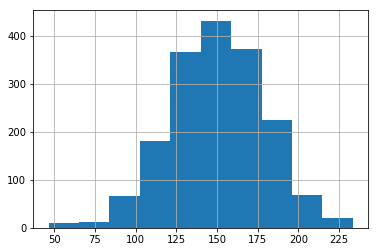

In [9]:
all_ladies[all_ladies['Free Rank'].str.isalpha() != True]['Points'].astype(float).hist()

In [12]:
completed = all_ladies[all_ladies['Free Rank'].str.isalpha() != True]

In [25]:
ladies_17 = pd.concat(ladies[-10:])

In [29]:
ladies_17[ladies_17['Free Rank'].str.isalpha() != True]['Points'].astype(float).hist()

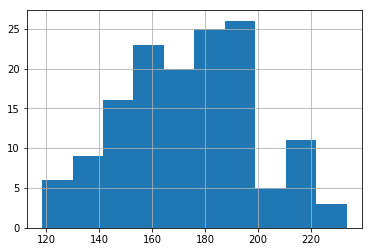

In [30]:
plt.show()

In [45]:
def ascii_encode_dict(data):
    ascii_encode = lambda x: x.encode('ascii')
    return dict(map(ascii_encode, pair) for pair in data.items())

with open('men_name_fixes.json') as f:
    men_name_fixes = f.read()
men_name_fixes = json.loads(men_name_fixes, object_hook=ascii_encode_dict)

In [7]:
all_men_results = pd.concat(men)

In [35]:
all_men_results.Date = pd.to_datetime(all_men_results['Date'])

In [47]:
for wrong_name, right_name in men_name_fixes.iteritems():
    all_men_results.loc[all_men_results.Name == wrong_name, 'Name'] = right_name

In [85]:
all_men_results = all_men_results[all_men_results['Event'] != 'gpfra2015']

In [55]:
winners = all_men_results[all_men_results['Rank'] == 1]
winners = winners[winners['Event'] != 'gpfra2015']

In [80]:
hanyu = all_men_results[all_men_results['Name'] == 'Yuzuru HANYU']
patrick = all_men_results[all_men_results['Name'] == 'Patrick CHAN']
patrick = patrick[patrick['Event'] != 'gpfra2015']
shoma = all_men_results[all_men_results['Name'] == 'Shoma UNO']
shoma = shoma[shoma['Event'] != 'gpfra2015']
javi = all_men_results[all_men_results['Name'] == 'Javier FERNANDEZ']
javi = javi[javi['Free Rank'] != 'DNQ']
boyang = all_men_results[all_men_results['Name'] == 'Boyang JIN']
mikhail = all_men_results[all_men_results['Name'] == 'Mikhail KOLYADA']
nathan = all_men_results[all_men_results['Name'] == 'Nathan CHEN']

In [81]:
for data, name in ((hanyu, 'Yuzu'),
                   (patrick, 'Patrick'),
                   (shoma, 'Shoma'),
                   (javi, 'Javi'),
                   (boyang, 'Boyang'),
                   (mikhail, 'Mikhail'),
                   (nathan, 'Nathan')):
    plt.plot(data['Date'], data['Points'].astype(float), label=name)
plt.legend()

In [90]:
data = all_men_results[all_men_results['Name'] == 'Jason BROWN']
plt.plot(data['Date'], data['Points'].astype(float), label=name)

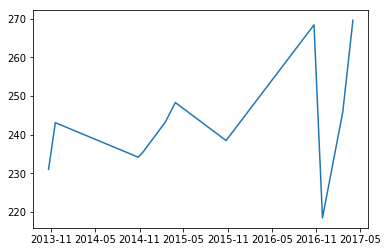

In [92]:
plt.show()

In [107]:
all_men_results[all_men_results['Free Rank'].str.isalpha() != True]['Points'].astype(float).hist()

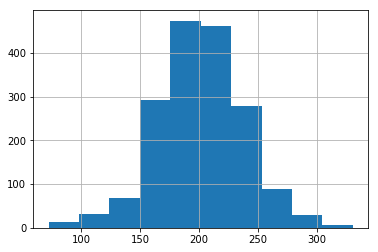

In [108]:
plt.show()

In [116]:
def get_similar_names(skaters):
    def get_first_last(single_skater):
        split = single_skater.split()
        if len(split) != 2:
            return None
        return split[0].lower(), split[1].lower()
    similar = []
    first_last = {}
    num_skaters = len(skaters)
    for i in xrange(num_skaters):
        split_i = get_first_last(skaters[i])
        for j in xrange(i + 1, num_skaters):
            added = False
            split_j = get_first_last(skaters[j])
            if split_i and split_j:
                if levenshtein(split_i[0], split_j[1]) < 3 and levenshtein(split_i[1], split_j[0]) < 3:
                    if skaters[j][-1].islower():
                        first_last[skaters[j]] = skaters[i]
                    else:
                        first_last[skaters[i]] = skaters[j]
                    added = True
            if not added and levenshtein(skaters[i], skaters[j]) < 7:
                similar.append((skaters[i], skaters[j]))     
    return similar, first_last

In [117]:
get_similar_names(pd.concat(ladies)['Name'].unique())

([('Elena SOKOLOVA', 'Elena GLEBOVA'),
  ('Elena SOKOLOVA', 'Alena LEONOVA'),
  ('Elena SOKOLOVA', 'Alina FJODOROVA'),
  ('Elena SOKOLOVA', 'Elena RADIONOVA'),
  ('Beatrisa LIANG', 'Teresa LIN'),
  ('Emily HUGHES', 'Emily NAPHTAL'),
  ('Mira LEUNG', 'Tina WANG'),
  ('Mira LEUNG', 'Mirna LIBRIC'),
  ('Mira LEUNG', 'Bingwa GENG'),
  ('Mira LEUNG', 'Ira VANNUT'),
  ('Mira LEUNG', 'Ying ZHANG'),
  ('Mira LEUNG', 'KIM Yuna'),
  ('Mira LEUNG', 'Rika HONGO'),
  ('Julia SEBESTYEN', 'Julia SHEREMET'),
  ('Julia SEBESTYEN', 'Julia SAUTER'),
  ('Dan FANG', 'Yan LIU'),
  ('Dan FANG', 'Mao ASADA'),
  ('Dan FANG', 'Na HOU'),
  ('Dan FANG', 'Mai ASADA'),
  ('Dan FANG', 'Diane CHEN'),
  ('Dan FANG', 'LIU Yan'),
  ('Dan FANG', 'Yueren WANG'),
  ('Dan FANG', 'Tina WANG'),
  ('Dan FANG', 'WANG Tina'),
  ('Dan FANG', 'Dasa GRM'),
  ('Dan FANG', 'Kexin ZHANG'),
  ('Dan FANG', 'Ying ZHANG'),
  ('Dan FANG', 'KIM Yuna'),
  ('Dan FANG', 'Angela WANG'),
  ('Dan FANG', 'Lu ZHENG'),
  ('Dan FANG', 'Amy LIN'),
  (